In [1]:
from RubiksCube.envs.cube_env import CubeEnv
import base64
import IPython

## Create an environment 
n = Number of blocks on a side of the cube

randomize = Number of random steps to be taken from the solved position

Let us create a 3x3 cube without any scrambling

In [2]:
env = CubeEnv(n=3, randomize=0)
env.max_steps = 20

In case of a 3x3 cube, there is 24 possible moves

In [3]:
env.action_space

Discrete(24)

In [4]:
for i in range(10):
    state, reward, done, info = env.step(env.action_space.sample())

At any point in time, get all the episodes till now

In [5]:
env.episodes

[8, 13, 2, 14, 19, 3, 22, 11, 4, 16]

In [6]:
env.readable_moves()

[('F', 0, -1),
 ('B', 0, 1),
 ('U', 1, -1),
 ('B', 1, -1),
 ('R', 1, 1),
 ('U', 1, 1),
 ('L', 1, -1),
 ('F', 1, 1),
 ('D', 0, -1),
 ('R', 0, -1)]

In [7]:
env.solved

False

In [8]:
env.state

array([4, 1, 4, 5, 2, 5, 3, 3, 0, 5, 4, 5, 0, 3, 0, 1, 2, 2, 1, 2, 2, 5,
       4, 3, 4, 1, 4, 5, 4, 5, 4, 5, 2, 0, 3, 3, 1, 5, 1, 1, 0, 1, 3, 2,
       3, 2, 0, 0, 3, 1, 4, 2, 0, 0])

## Render the current state

/Users/alse/Library/Python/3.6/lib/python/site-packages/matplotlib/figure.py:445: UserWarning: Matplotlib is currently using module://ipykernel.pylab.backend_inline, which is a non-GUI backend, so cannot show the figure.
  % get_backend())


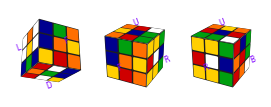

In [9]:
env.render()

Get the numpy array of the rendered pixels

(86, 250, 3)


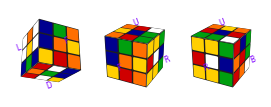

In [10]:
print(env.render(mode='rgb_array').shape)

## Embed a video of the episodes

IMAGEIO FFMPEG_WRITER WARNING: input image is not divisible by macro_block_size=16, resizing from (250, 86) to (256, 96) to ensure video compatibility with most codecs and players. To prevent resizing, make your input image divisible by the macro_block_size or set the macro_block_size to 1 (risking incompatibility).


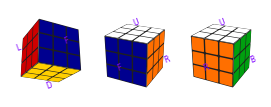

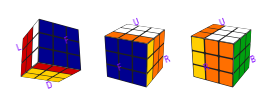

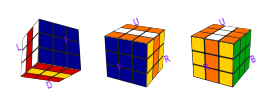

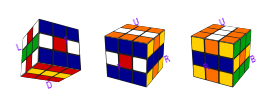

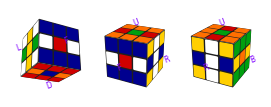

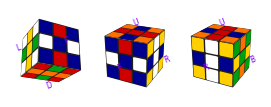

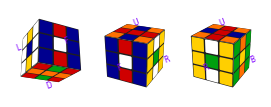

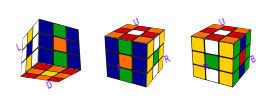

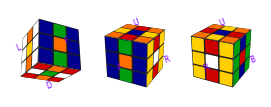

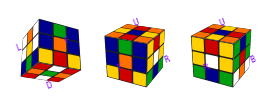

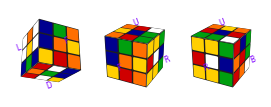

In [11]:
env.render_episodes(filename='out.mp4')

In [12]:
video = open("out.mp4",'rb').read()
b64 = base64.b64encode(video)
tag = '''
<video width="640" height="480" controls>
<source src="data:video/mp4;base64,{0}" type="video/mp4">
Your browser does not support the video tag.
</video>'''.format(b64.decode())

IPython.display.HTML(tag)

### Reset the environment

In [13]:
env.reset()

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 3, 3, 3, 3, 3, 3, 3, 3, 3, 4, 4, 4, 4, 4, 4, 4, 4,
       4, 5, 5, 5, 5, 5, 5, 5, 5, 5])

# Train

We can use any framework to train a model to solve it. Here, I am using a simple Deep Q-Network to demonstrate how it can be done. This is obviously not the most optimal way to solve it.

In [14]:
from baselines import deepq

In [15]:
env = CubeEnv(2, randomize=1)
env.max_steps = 2

In [16]:
q_func = deepq.models.mlp([64, 64])

In [17]:
model = deepq.learn(
        env,
        q_func=q_func,
        lr=1e-4,
        buffer_size=50000,
        max_timesteps=1000000,
        exploration_fraction=0.1,
        exploration_final_eps=0.01,
        train_freq=4,
        print_freq=1000,
        learning_starts=10000,
        target_network_update_freq=1000,
        gamma=0.99,
        prioritized_replay=True,
        prioritized_replay_alpha=0.6,
        callback=lambda x,y: sum(x['episode_rewards'][-101:-1]) >= 95)

Instructions for updating:
Colocations handled automatically by placer.
Instructions for updating:
Use tf.cast instead.


/usr/local/Cellar/python/3.6.5/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/numpy/core/fromnumeric.py:3118: RuntimeWarning: Mean of empty slice.
  out=out, **kwargs)
/usr/local/Cellar/python/3.6.5/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/numpy/core/_methods.py:85: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)


--------------------------------------
| % time spent exploring  | 98       |
| episodes                | 1000     |
| mean 100 episode reward | 0        |
| steps                   | 1993     |
--------------------------------------
--------------------------------------
| % time spent exploring  | 96       |
| episodes                | 2000     |
| mean 100 episode reward | 0        |
| steps                   | 3988     |
--------------------------------------
--------------------------------------
| % time spent exploring  | 94       |
| episodes                | 3000     |
| mean 100 episode reward | 0        |
| steps                   | 5984     |
--------------------------------------
--------------------------------------
| % time spent exploring  | 92       |
| episodes                | 4000     |
| mean 100 episode reward | 0        |
| steps                   | 7975     |
--------------------------------------
--------------------------------------
| % time spent exploring 

KeyboardInterrupt: 

In [6]:
model.save("model.pkl")